# **NLP-BASED SENTIMENT ANALYSIS**
TASK:
 > Perform Text Classification on the data. The tweets have been pulled 
from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.

Columns:
> 1) Location
> 2) Tweet At
> 3) Original Tweet
> 4) Label

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt
import tensorflow

In [2]:
!pip install gensim

In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## **Step 1: Loading the data**

In [5]:
train_data = pd.read_csv('Corona_NLP_train.csv')
test_data = pd.read_csv('Corona_NLP_test.csv')


In [6]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [8]:
train_data.info() # Basic Information
print("\nShape: ",train_data.shape) # Shape of data
print("\nChecking for missing values")
train_data.isnull().sum()# Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB

Shape:  (41157, 6)

Checking for missing values


UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
#Dropping unnecessary columns
train_data.drop(['Location','ScreenName','UserName','TweetAt'],axis=1,inplace=True)
test_data.drop(['Location','ScreenName','UserName','TweetAt'],axis=1,inplace=True)

In [10]:
train_data.head()



,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [11]:
print("Count of sentiment wise values: \n",train_data.Sentiment.value_counts())


Count of sentiment wise values: 
 Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


 ## **Step 2: Data Analysis & Visualisation**

In [12]:
fig=px.histogram(train_data,
                x='Sentiment',
                title='Sentiment Count ',
                color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()
fig = px.pie(train_data, names='Sentiment',title="Sentiment Distribution")
fig.show()


#### inferences:
- Maximum tweets belong to Positive sentiment followed by negative
- the positive to negative ratio is quite similar.
- 



In [13]:
#Merging data columns Extremely Neagtive Sentiment as Negative and Extremely Positive Sentiment as Positive.
def merge(df):
    df['Sentiment'].replace(to_replace='Extremely Negative',value='Negative',inplace=True)
    df['Sentiment'].replace(to_replace='Extremely Positive',value='Positive',inplace=True)
merge(train_data)
merge(test_data)



In [14]:
train_data['Sentiment'].unique()
test_data['Sentiment'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [15]:
fig = px.pie(train_data, names='Sentiment',title="Sentiment Distribution")
fig.show()

#### Inferences
- Positive tweets still remain maximum followed by negative and neutral respectively

### Step 2A: Data Preprocessing

In [16]:
##Function to extract the tweet length   
def text_length(tweet):
    str_len=len(tweet.split(" "))
    return(str_len)
train_data['OriginalLength']= train_data['OriginalTweet'].apply(lambda x:text_length(x))
train_data.head()

,OriginalTweet,Sentiment,OriginalLength
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38


In [17]:
for i in range (5):
    print(train_data.OriginalTweet[i])
    print("========================================")

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j




#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n


In [18]:
train_data['OriginalLength'].describe()

count    41157.000000
mean        30.327818
std         11.633754
min          1.000000
25%         21.000000
50%         31.000000
75%         40.000000
max        127.000000
Name: OriginalLength, dtype: float64

In [19]:
fig = px.histogram(train_data,
                  x='OriginalLength',
                  marginal='box',
                  title="Length of original tweets")
fig.update_layout(bargap=0.1)
fig.show()

#### Inferences:
- Somewhat normal distribution skewed towards right
- outliers are present
- Range of length lies b/w 1 to 127

####  Need for preprocessing
- This tweets contain words and parts that do not contribute to the sentiment it conveys.
- e.g. : Links, Symbols ,Numbers, Carriage returns , Spaces, URLS, etc
- Hence it is necessary to clean the data for better performance

In [20]:
#print(set(stopwords.words('english')))

In [21]:
import string

def data_cleaning(data):
    cleaned_data = []
    fillerWord = ("so","yeah","okay","um","uh","mmm","ahan","uh","huh","ahm","oh","sooo","uh","huh","yeh","yah","hmm","bye")
    fillerword_reg= "bye[.,]|so[.,]|yeah[.,]|okay[.,]|um[.,]|uh[.,]|mmm[.,]|ahan[.,]|uh[.,]|huh[.,]|ahm[.,]|oh[.,]|sooo[.,]|uh[.,]|huh[.,]|yeh[.,]|yah[.,]|hmm[.,]"
    STOPWORDS = set(stopwords.words('english'))
    remove=["doesn't","not","nor","neither","isn't","hadn't","mightn't","needn't","wasn't"]
    for i in remove:
        STOPWORDS.discard(i)
    
    STOPWORDS.add(fillerWord)  
    for i in range(len(data)):
        tweet = re.sub("#", "", data[i])#extracting hashtags
        tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '',tweet, flags=re.MULTILINE)#extracting links
        html=re.compile(r'<.*?>')#extracting html tags
        tweet =html.sub(r"", tweet)
        #extracting symbols and characters
        tweet=re.sub(r'@\w+',"",tweet)
        tweet=re.sub(r'#\w+',"",tweet) 
        tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet) 
        punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
        tweet.rstrip(string.punctuation)
        tweet=re.sub('[^A-Za-z\s]+',"", tweet)
        tweet = tweet.lower()
        tweet = tweet.split()
        #Lemmatization to normalise text
        tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in STOPWORDS]
        tweet = ' '.join(tweet)
        filler=re.compile(fillerword_reg)
        tweet=filler.sub("",tweet)
        cleaned_data.append(tweet)
    return cleaned_data

In [22]:
####Preprocessing and cleaning train data
texto_data=train_data['OriginalTweet'].tolist()
process_text=data_cleaning(texto_data)

cleaned_tweet =pd.DataFrame(process_text)
train_data['CleanedTweet']=cleaned_tweet
#cleaned_tweet.head()


train_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,
1,advice Talk to your neighbours family to excha...,Positive,38,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,Positive,40,food stock not one empty please dont panic eno...
4,"Me, ready to go at supermarket during the #COV...",Negative,38,ready go supermarket covid outbreak not im par...


In [23]:
####Preprocessing and cleaning test data
test_data['OriginalLength']= test_data['OriginalTweet'].apply(lambda x:text_length(x))
texto_data=test_data['OriginalTweet'].tolist()
process_text=data_cleaning(texto_data)

cleaned_tweet =pd.DataFrame(process_text)
test_data['CleanedTweet']=cleaned_tweet
#cleaned_tweet.head()
test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,23,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,31,couldnt find hand sanitizer fred meyer turned ...
2,Find out how you can protect yourself and love...,Positive,13,find protect loved one coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,35,panic buying hit newyork city anxious shopper ...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,30,toiletpaper dunnypaper coronavirus coronavirus...


In [24]:
#Adding length of cleaned tweet to dataset
train_data['NewLength']= train_data['CleanedTweet'].apply(lambda x:text_length(x))
test_data['NewLength']= test_data['CleanedTweet'].apply(lambda x:text_length(x))
train_data.head()
#test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet,NewLength
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,,1
1,advice Talk to your neighbours family to excha...,Positive,38,advice talk neighbour family exchange phone nu...,28
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworth give elderly d...,12
3,My food stock is not the only one which is emp...,Positive,40,food stock not one empty please dont panic eno...,25
4,"Me, ready to go at supermarket during the #COV...",Negative,38,ready go supermarket covid outbreak not im par...,24


In [25]:
print(train_data.NewLength.describe())
fig = px.histogram(train_data,
                  x='NewLength',
                  marginal='box',
                  title="Length of cleaned tweets",
                  color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()

count    41157.000000
mean        17.667347
std          6.632804
min          1.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         40.000000
Name: NewLength, dtype: float64


#### Inferences:
- Range changed significantly to 0-40
- No of outliers decreased

#### Seperating features and response

In [26]:
X_train = train_data.CleanedTweet
Y_train = train_data.Sentiment

In [27]:
Y_train = train_data.Sentiment
Y_train.shape

(41157,)

#### Label Encoding of response i.e. Categorical Variables

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
#encoder.classes_

In [30]:
Y_train = pd.DataFrame(Y_train,columns=['Sentiment'])
Y_train.head()

,Sentiment
0,1
1,2
2,2
3,2
4,0


In [31]:
test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet,NewLength
0,TRENDING: New Yorkers encounter empty supermar...,Negative,23,trending new yorkers encounter empty supermark...,18
1,When I couldn't find hand sanitizer at Fred Me...,Positive,31,couldnt find hand sanitizer fred meyer turned ...,14
2,Find out how you can protect yourself and love...,Positive,13,find protect loved one coronavirus,5
3,#Panic buying hits #NewYork City as anxious sh...,Negative,35,panic buying hit newyork city anxious shopper ...,26
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,30,toiletpaper dunnypaper coronavirus coronavirus...,23


In [32]:
X_test = test_data.CleanedTweet
Y_test = test_data.Sentiment

In [33]:
X_test.head()
Y_test.head()

0    Negative
1    Positive
2    Positive
3    Negative
4     Neutral
Name: Sentiment, dtype: object

In [34]:
Y_test = encoder.fit_transform(Y_test)


In [35]:
Y_test = pd.DataFrame(Y_test,columns=['Sentiment'])

In [36]:
Y_test.head()


,Sentiment
0,0
1,2
2,2
3,0
4,1


## **Step 3: Choosing a model**

## ML Models:-

##### Initialising bag of word

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

(41157, 3000)

In [39]:
X_test_data = vectorizer.fit_transform(X_test)

In [40]:
X_train_data.shape


(41157, 3000)

In [41]:
Y_train.shape

(41157, 1)

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
transformer = TfidfTransformer()
X_train_data = transformer.fit_transform(X_train_data).toarray()

print(X_train_data.shape)
#X_train_data[0]

(41157, 3000)


In [44]:
Y_train.head()

,Sentiment
0,1
1,2
2,2
3,2
4,0


### Naive Bayes Multinomial Classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#### Using train_test_split

In [46]:

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_data, Y_train, test_size=0.33,random_state = 15)

In [47]:
model1_nb = MultinomialNB()
y_train_pred = model1_nb.fit(X1_train,y1_train.Sentiment).predict(X1_train)

y_pred = model1_nb.predict(X1_test)
  
# comparing actual response values  with predicted response values 
from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy(in %):", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy(in %):", metrics.accuracy_score(y1_test, y_pred)*100)

Multinomial Naive Bayes model train accuracy(in %): 70.8286491387126
Multinomial Naive Bayes model test accuracy(in %): 66.58813135031659


#### Inferences:
- Very Poor performance on test data when train_test_split was not used
- Better performance on test data while using train_test_split
- Overall accuracy of the model shows average performance


#### HyperParameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {'alpha': [0.01,0.1,0.5,1,10],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_data,Y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_train, y1_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_test, y1_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy : 0.709
Test Accuracy : 0.710
Best Accuracy Through Grid Search : 0.670
Best Parameters :  {'alpha': 0.1}


## Gradient Boosting Classifier


In [50]:
from sklearn.ensemble import GradientBoostingClassifier 

In [51]:
gboost_m = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
train_pred = gboost_m.fit(X1_train,y1_train.Sentiment).predict(X1_train)
prediction = gboost_m.score(X1_test,y1_test )
print("Gradient Boosting model train accuracy( in % ): ",accuracy_score(y1_train, train_pred)*100 )
print("Gradient Boosting model test accuracy( in % ): ", prediction*100)

Gradient Boosting model train accuracy( in % ):  73.66455122393472
Gradient Boosting model test accuracy( in % ):  71.16772198498012


#### Inferences:
- Relatively better performance than Naive Bayes' Classifier
- Overall not a bad performance

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
train_pred = rf_model.fit(X1_train,y1_train.Sentiment).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)


Random Forest model train accuracy( in % ):  99.80417044424298
random Forest model test accuracy( in % ):  71.33706376085996


In [53]:

rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)
train_pred = rf_model.fit(X1_train,y1_train.Sentiment).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  76.75430643699002
random Forest model test accuracy( in % ):  70.15167132970107


#### HyperParameter Tuning

#### Inferences:
- The first model performs very good on train data but performs poorly on test data
- Thus, the model is an overfit and we need to perform hyperparameter tuning
- After hyperparameter tuning, the test accuracy came around 71% and train accuracy turned out to be around 76%.
- This classifier performed better than Naive Bayes and Gradient Boost.


In [54]:
#from sklearn.model_selection import RandomizedSearchCV

In [55]:
'''
max_depth = [1,2]
min_samples_split = [5]
min_samples_leaf = [1, 2]
random_grid = {
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X1_train,y1_train)
print(rf_randomcv.best_params_)
print(rf_randomcv)
#print(rf_randomcv.best_estimator_)
best_random_grid=rf_randomcv.best_estimator_
print(best_random_grid)'''

"\nmax_depth = [1,2]\nmin_samples_split = [5]\nmin_samples_leaf = [1, 2]\nrandom_grid = {\n               \n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n              'criterion':['entropy','gini']}\nprint(random_grid)\n\nrf=RandomForestClassifier()\nrf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,\n                               random_state=100,n_jobs=-1)\n### fit the randomized model\nrf_randomcv.fit(X1_train,y1_train)\nprint(rf_randomcv.best_params_)\nprint(rf_randomcv)\n#print(rf_randomcv.best_estimator_)\nbest_random_grid=rf_randomcv.best_estimator_\nprint(best_random_grid)"

## Actual Testing i.e. using the test data
- Uptil now, we have set aside a portion of the train data and used it as test data.
- Let's observe the performance on the actual test data i.e. data in test.csv file

In [56]:
rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)

x_predicted = rf_model.fit(X_train_data,Y_train.Sentiment).predict(X_train_data)
y_predicted = rf_model.predict(X_test_data)
print("Train accuracy(in %):", accuracy_score(Y_train, x_predicted)*100)
print("Test accuracy(in %):", accuracy_score(Y_test, y_predicted)*100)

Train accuracy(in %): 77.59068931166023
Test accuracy(in %): 36.914165350184305


##### Result: Very bad performance
- REASON: While performing sentiment analysis, the sequence of words plays the most important role. 

- We need to be able to keep track of each word and when it occurs in the data. 
- Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. 
- Hence, we will be using a special type of neural network called the RNN

# **Step 4: Building, evaluating and tuning the final model**

# Deep Learning Approach: An RNN Model
- Simple neural networks are simply of feed-forward type
-  A RNN is a special type of neural network that will process one word at a time while maintaining an internal memory of what it's already seen. 
- This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.
-  In a simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

In [57]:
print("X_train\n",X_train.head())
print("Y_train\n",Y_train.head())

print("X_test\n",X_test.head())
print("Y_test\n",Y_test.head())

X_train
 0                                                     
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock not one empty please dont panic eno...
4    ready go supermarket covid outbreak not im par...
Name: CleanedTweet, dtype: object
Y_train
    Sentiment
0          1
1          2
2          2
3          2
4          0
X_test
 0    trending new yorkers encounter empty supermark...
1    couldnt find hand sanitizer fred meyer turned ...
2                   find protect loved one coronavirus
3    panic buying hit newyork city anxious shopper ...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: CleanedTweet, dtype: object
Y_test
    Sentiment
0          0
1          2
2          2
3          0
4          1


### Tokenisation, Sequencing and Padding

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer



In [59]:
tokenizer = Tokenizer(num_words=50000, 
                      
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='<UNK>',
                      document_count=0)

In [60]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(Y_train)

wordindex=tokenizer.word_index

In [61]:
tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()
#tokenizer_config['word_counts']

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [62]:
import tensorflow.keras.preprocessing.sequence as ps

In [63]:
max_length = 50
train_sequence = tokenizer.texts_to_sequences(X_train)
train_padding = ps.pad_sequences(train_sequence,maxlen=max_length,padding='post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_padding = ps.pad_sequences(test_sequence,maxlen=max_length,padding='post')

In [64]:
#print(test_padding[0])
#train_padding[0]
train_padding.shape
Y_train.shape

(41157, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
y_train = OneHotEncoder().fit_transform(Y_train)

In [66]:
y_train.shape
y_test = OneHotEncoder().fit_transform(Y_test)
y_test.shape

(3798, 3)

## Building the model


In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding,Dropout, Bidirectional

from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling1D


In [68]:
# Building the BASELINE MODEL
base_model = Sequential()
base_model.add(Embedding(50000,128,input_length=train_padding.shape[1]))
base_model.add(GlobalAveragePooling1D())
base_model.add(Dense(8,activation='relu'))
base_model.add(Dense(3,activation='softmax'))

In [69]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           6400000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 6,401,059
Trainable params: 6,401,059
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Compiling the model

base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
y_train=np.array(y_train.toarray())

In [72]:
train_padding=np.array(train_padding)

In [73]:
#Fitting the model

history_base = base_model.fit(train_padding,y_train ,epochs=10, validation_split=0.2)

Epoch 1/10
1029/1029 [==============================] - 73s 71ms/step - loss: 0.8710 - accuracy: 0.6097 - val_loss: 0.6845 - val_accuracy: 0.7239
Epoch 2/10
1029/1029 [==============================] - 72s 70ms/step - loss: 0.5105 - accuracy: 0.8163 - val_loss: 0.5717 - val_accuracy: 0.7852
Epoch 3/10
1029/1029 [==============================] - 71s 69ms/step - loss: 0.3494 - accuracy: 0.8887 - val_loss: 0.5458 - val_accuracy: 0.8008
Epoch 4/10
1029/1029 [==============================] - 71s 69ms/step - loss: 0.2564 - accuracy: 0.9236 - val_loss: 0.5727 - val_accuracy: 0.8037
Epoch 5/10
1029/1029 [==============================] - 72s 69ms/step - loss: 0.1976 - accuracy: 0.9427 - val_loss: 0.6359 - val_accuracy: 0.7923
Epoch 6/10
1029/1029 [==============================] - 72s 70ms/step - loss: 0.1582 - accuracy: 0.9546 - val_loss: 0.6945 - val_accuracy: 0.7857
Epoch 7/10
1029/1029 [==============================] - 71s 69ms/step - loss: 0.1287 - accuracy: 0.9639 - val_loss: 0.7740 -

#### Performance Visualisation

(0.0, 1.0385501641780137)

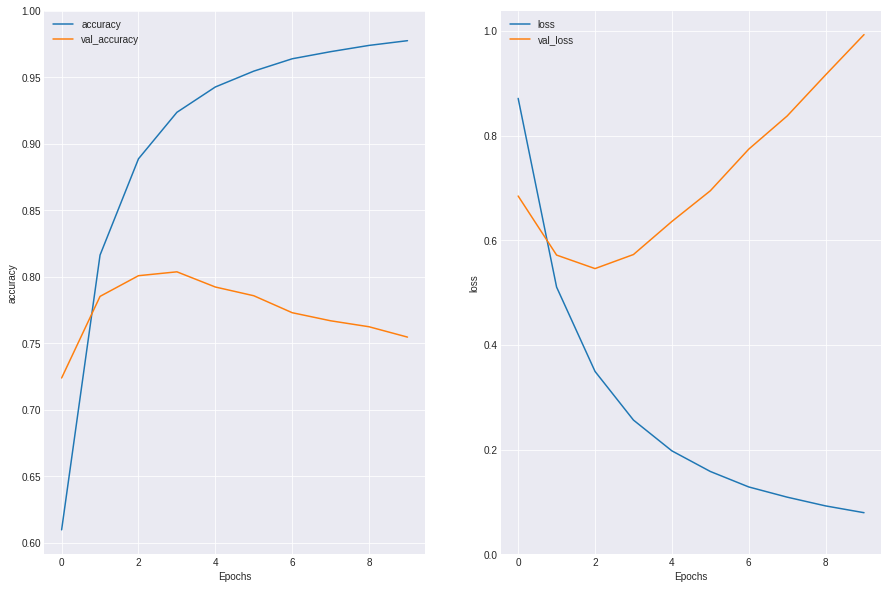

In [74]:
plt.style.use('seaborn-darkgrid')
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

### Inferences:
- The model performs well on training data but has a significant difference b/w train data and validation data
- The model is overfit in nature

## Handling overfitting

In [75]:
regularise = tensorflow.keras.regularizers.l2(0.001)

model_r = Sequential()
model_r.add(Embedding(50000,128,input_length=train_padding.shape[1]))
model_r.add(Dropout(0.5))
model_r.add(GlobalAveragePooling1D())
model_r.add(Dense(8,activation='relu',kernel_regularizer=regularise))
model_r.add(Dropout(0.5))
model_r.add(Dense(3,activation='softmax'))
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           6400000   
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 6,401,059
Trainable params: 6,401,059
Non-trainable params: 0
____________________________________________

In [76]:
#Compiling the model
model_r.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
#Fitting the model

history_r = model_r.fit(train_padding,y_train ,epochs=8, validation_split=0.2)

Epoch 1/8
1029/1029 [==============================] - 72s 69ms/step - loss: 1.0063 - accuracy: 0.4904 - val_loss: 0.9000 - val_accuracy: 0.6534
Epoch 2/8
1029/1029 [==============================] - 71s 69ms/step - loss: 0.8821 - accuracy: 0.5667 - val_loss: 0.8037 - val_accuracy: 0.6825
Epoch 3/8
1029/1029 [==============================] - 70s 68ms/step - loss: 0.8111 - accuracy: 0.6366 - val_loss: 0.7358 - val_accuracy: 0.7003
Epoch 4/8
1029/1029 [==============================] - 70s 68ms/step - loss: 0.7684 - accuracy: 0.6554 - val_loss: 0.7078 - val_accuracy: 0.7013
Epoch 5/8
1029/1029 [==============================] - 70s 68ms/step - loss: 0.7399 - accuracy: 0.6614 - val_loss: 0.6927 - val_accuracy: 0.6968
Epoch 6/8
1029/1029 [==============================] - 69s 67ms/step - loss: 0.7193 - accuracy: 0.6662 - val_loss: 0.6717 - val_accuracy: 0.7072
Epoch 7/8
1029/1029 [==============================] - 69s 67ms/step - loss: 0.6968 - accuracy: 0.6726 - val_loss: 0.6617 - val_ac

(0.0, 1.0240397661924363)

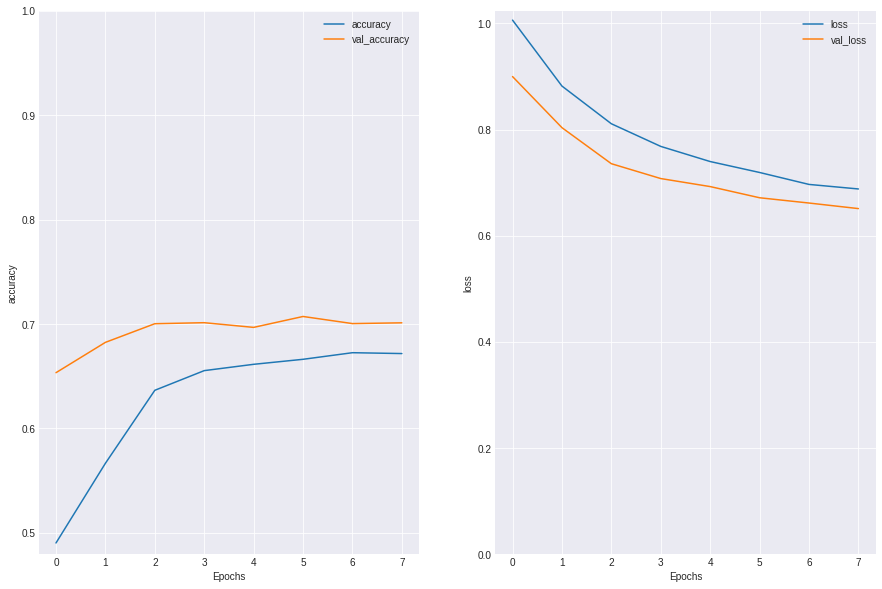

In [78]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_r, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_r, 'loss')
plt.ylim(0, None)

#### Model evaluation

In [79]:
score = model_r.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.7206
Testing Accuracy(%):  72.06424474716187


In [80]:
y_pred = model_r.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

In [ ]:
from sklearn.metrics import confusion_matrix

In [81]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

In [ ]:
import seaborn as sn

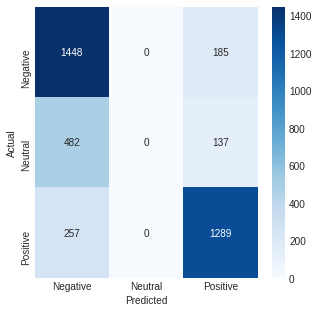

In [82]:
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Inferences:
- This model reduced overfitting to an extent
- It gives a good performance with an accuracy around 78%

## Using LSTM:(Long Short-Term Memory)
- In the simple RNN layer, input from previous timestamps gradually disappeared as we got further through the input.
- With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. 
- This allows for us to access any previous value we want at any point in time. 
- This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

In [83]:
from keras.constraints import max_norm

In [96]:
#Building the model
model1 = Sequential([
    Embedding(50000,128,input_length=train_padding.shape[1]),
    Dropout(0.5),
    LSTM(32,kernel_constraint=max_norm(3)),
    Dense(32,activation='relu',kernel_regularizer=regularise),
    Dropout(0.5),
    Dense(3,activation='softmax')
])
#Compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model
history1 =  model1.fit(train_padding,y_train ,epochs=8, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/8
1029/1029 [==============================] - 95s 90ms/step - loss: 1.0031 - accuracy: 0.4564 - val_loss: 0.8626 - val_accuracy: 0.6136
Epoch 2/8
1029/1029 [==============================] - 93s 90ms/step - loss: 0.7495 - accuracy: 0.7064 - val_loss: 0.6123 - val_accuracy: 0.7671
Epoch 3/8
1029/1029 [==============================] - 92s 89ms/step - loss: 0.5231 - accuracy: 0.8265 - val_loss: 0.5067 - val_accuracy: 0.8208
Epoch 4/8
1029/1029 [==============================] - 92s 89ms/step - loss: 0.4074 - accuracy: 0.8732 - val_loss: 0.5333 - val_accuracy: 0.8303
Epoch 5/8
1029/1029 [==============================] - 93s 90ms/step - loss: 0.3265 - accuracy: 0.9022 - val_loss: 0.5535 - val_accuracy: 0.8259
Epoch 6/8
1029/1029 [==============================] - 92s 89ms/step - loss: 0.2857 - accuracy: 0.9169 - val_loss: 0.6145 - val_accuracy: 0.8229


(0.0, 1.038989318907261)

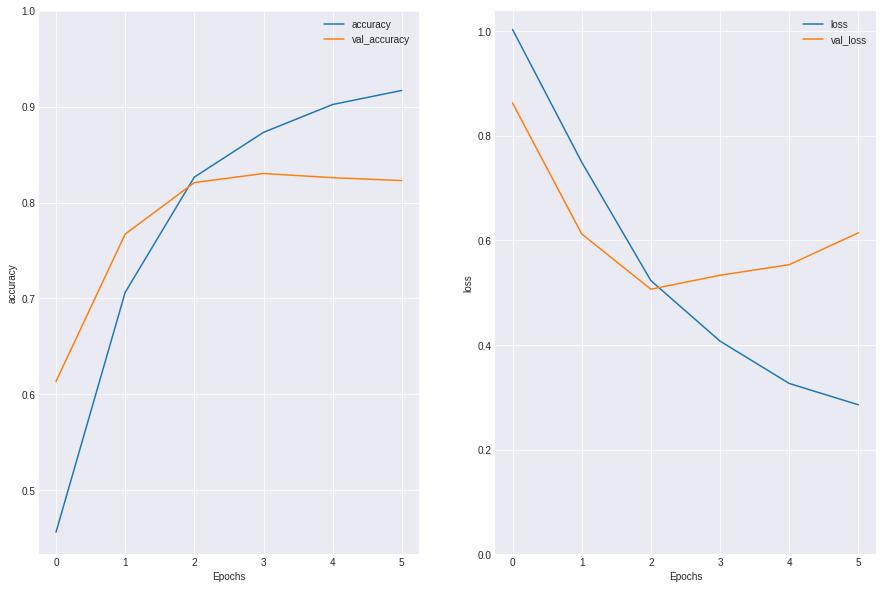

In [97]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

#### Model evaluation

In [98]:
score = model1.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 1s 8ms/step - loss: 0.6361 - accuracy: 0.8152
Testing Accuracy(%):  81.51658773422241


In [87]:
y_pred = model1.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

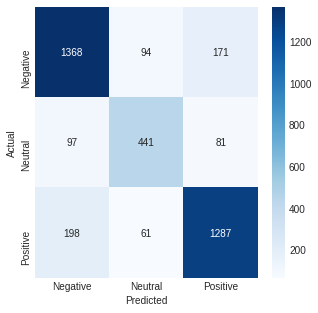

In [99]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [108]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
print('\n=================Classification Report========================\n')
print(classification_report(y_test_labels, y_predicted_labels, target_names=['Class  Negative',	 'Class Neutral','Class positive']))


=================Classification Report========================

                 precision    recall  f1-score   support

Class  Negative       0.82      0.84      0.83      1633
  Class Neutral       0.74      0.71      0.73       619
 Class positive       0.84      0.83      0.83      1546

       accuracy                           0.82      3798
      macro avg       0.80      0.79      0.80      3798
   weighted avg       0.81      0.82      0.81      3798



#### Inferences:
The model with LSTM performed much better than simple RNN as there is an increase in accuracy, both training as well as testing
A bit of hyperparameter tuning was done to prevent overfitting

In [101]:
#Building the model
model2 = Sequential([
    Embedding(50000,128,input_length=train_padding.shape[1]),
    Bidirectional(LSTM(128,return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(3,activation='softmax')
])
#Compiling the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model
history2 =  model2.fit(train_padding,y_train ,epochs=8, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/8
1029/1029 [==============================] - 260s 247ms/step - loss: 0.6915 - accuracy: 0.7188 - val_loss: 0.4537 - val_accuracy: 0.8395
Epoch 2/8
1029/1029 [==============================] - 252s 245ms/step - loss: 0.3816 - accuracy: 0.8777 - val_loss: 0.4578 - val_accuracy: 0.8356
Epoch 3/8
1029/1029 [==============================] - 251s 244ms/step - loss: 0.2379 - accuracy: 0.9245 - val_loss: 0.5979 - val_accuracy: 0.8263
Epoch 4/8
1029/1029 [==============================] - 251s 244ms/step - loss: 0.1594 - accuracy: 0.9485 - val_loss: 0.6638 - val_accuracy: 0.8307


(0.0, 0.7180817343294621)

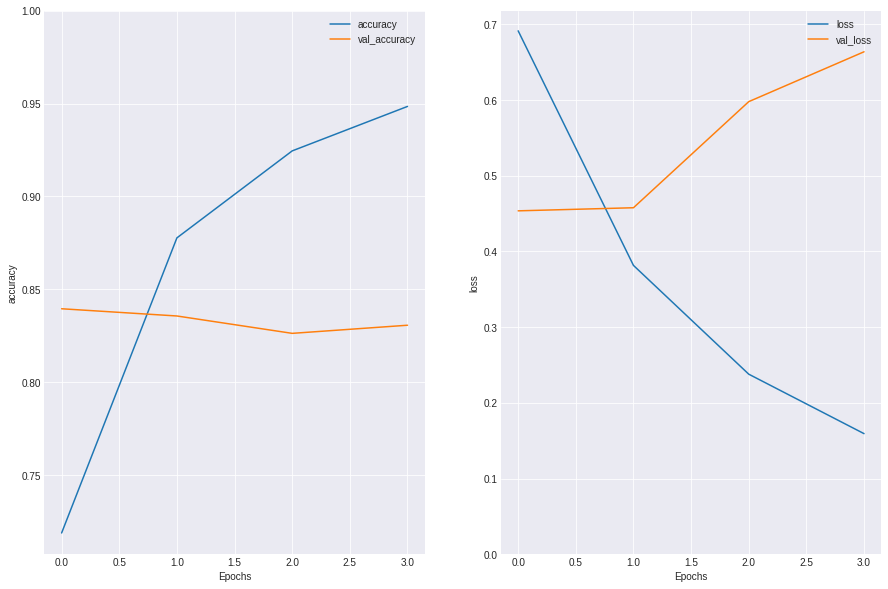

In [102]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')
plt.ylim(0, None)

#### Model evaluation

In [103]:
score = model2.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 5s 41ms/step - loss: 0.6443 - accuracy: 0.8233
Testing Accuracy(%):  82.33280777931213


In [93]:
y_pred = model2.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

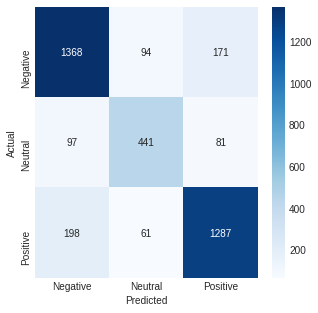

In [94]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [95]:
from sklearn.metrics import classification_report
print('\n=================Classification Report for Bidirectional LSTM========================\n')
print(classification_report(y_test_labels, y_predicted_labels, target_names=['Class  Negative',	 'Class Neutral','Class positive']))


=================Classification Report for Bidirectional LSTM========================

                 precision    recall  f1-score   support

Class  Negative       0.82      0.84      0.83      1633
  Class Neutral       0.74      0.71      0.73       619
 Class positive       0.84      0.83      0.83      1546

       accuracy                           0.82      3798
      macro avg       0.80      0.79      0.80      3798
   weighted avg       0.81      0.82      0.81      3798



##### Inferences:
- Though the model has better accuracy metric than LSTM, it suffers from overfitting

# **Conclusion**


- While dealing with problem statement related to sentiment analysis, the sequence of data plays an important role
- Therefore, the traditional ML models gives poor results
- To help the model preserve the sequence and understand the meaning of the data feature in form of text, recurrent neural network i.e., RNN is used as a baseline model
- LSTM and Bidirectional LSTM were built to improve the accuracy further
- Though the latter gave better accuracy, it suffered from the problem of overfitting.
- Thus, for this dataset, LSTM seems to be the feasible model.For around 5 epoch, it gave an accuracy around 82%

# Further scope:
- Use BERT and finetune it